<a href="https://colab.research.google.com/github/Jhoe73/data_science/blob/main/estatistica_descritiva_avaliacao_tempo_tarefas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Estamos interessados em testar o tempo computacional de uma função no python quando se executa três tarefas diferentes de analise de dados. Dada uma base de dados, as tarefas são:

- Tarefa A: Executar uma analise descritiva incluindo elaboração de gráficos;
- Tarefa B: Estimar um modelo de regressão;
- Tarefa C: Estimar um modelo de classificação binária.

Para avaliar o desempenho foi desenvolvido um experimento onde foram testadas 50 base de dados de diferente dimensões (diferentes tamanhos de amostras) com cada tarefa. Assim, podemos assumir independência entre as tarefas executadas. As variáveis registradas são:

- $tarefa$: Número de réplicas do experimento;
- $versao$: recebe valor 1 com a versão anterior e 2 com a nova versão
disponível;
- $t_A$: tempo computacional em micro segundos com a tarefa A;
- $t_B$: tempo computacional em micro segundos com a tarefa B;
- $t_C$: tempo computacional em micro segundos com a tarefa C.


# Leitura dos dados

In [ ]:
import pandas as pd
projeto1 = pd.read_csv("projeto1.csv")
print(projeto1.head(5))

   tarefa  versao        tA        tB       tC
0       1       1  401.4400  186.3505  145.330
1       2       1  437.7825  195.8830  149.837
2       3       1  418.1495  186.3685  143.043
3       4       1  414.6125  186.0220  142.776
4       5       1  470.5465  186.2660  141.575


O arquivo projeto1.csv é uma base de dados com 5 variáveis e 50 observações correspondentes as réplicas do experimento.


#  Estatísticas descritivas

**Usando pandas**

In [ ]:
projeto1.describe()

,tarefa,versao,tA,tB,tC
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,1.500000,397.917950,208.269530,130.233760
std,14.57738,0.505076,51.087703,48.526404,5.725115
min,1.00000,1.000000,331.619000,173.710000,125.348000
25%,13.25000,1.000000,337.255500,175.737000,126.774125
50%,25.50000,1.500000,406.403500,186.177000,127.341500
75%,37.75000,2.000000,441.812250,233.340000,133.909625
max,50.00000,2.000000,491.991500,326.439000,149.837000


São apresentadas estatísticas básicas incluindo os cinco números de Tukey. Para a interpretação ver o arquivo em Rstudio. As diferentes medidas estatísticas foram apresentadas nos slides e são amplamente conhecidas.
Sugerimos usar a função $\texttt{describe}$ do pacote $\texttt{panda}$.


##  Assimetria e Curtose

Faremos um maior detalhe destas medidas que não foram suficientemente explicadas nos slides.


In [ ]:
import pandas as pd
tempos = pd.DataFrame({"Tempo A": projeto1['tA'], "Tempo B": projeto1['tB'],"Tempo C": projeto1['tC']})
print("Tempos dos diferentes métodos: dados formato largo")
print(tempos.head(5))

Tempos dos diferentes métodos: dados formato largo
    Tempo A   Tempo B  Tempo C
0  401.4400  186.3505  145.330
1  437.7825  195.8830  149.837
2  418.1495  186.3685  143.043
3  414.6125  186.0220  142.776
4  470.5465  186.2660  141.575


A seguir calculamos a Assimetria

In [ ]:
assimetria = tempos.skew()
print("Assimetria")
print(assimetria)


Assimetria
Tempo A   -0.036330
Tempo B    1.346234
Tempo C    1.799913
dtype: float64


Como foi discutido no documento AULA-2-P1---Projeto-1-em-R.pdf não há uma única forma de obter a Assimetria. O valor da assimetria caculado aqui usando Panda, corresponde ao valor chamado tipo 2
definido por $G_1 = g_1 \sqrt{n(n-1)} / (n-2)$, onde $g_1 = m_3 / m_2^{3/2}$ e $m_r = \sum_i (x_i - \mu)^r / n$. Esta medida é default no R.
Uma outra forma de calcular a Assimetria é usar scipy.

In [ ]:
from scipy.stats import skew
print('\nAssimetria : ', skew(tempos))



Assimetria :  [-0.03523068  1.30550543  1.74545941]


Neste caso o valor corresponde a $g_1$ discutido acima e presente em diferentes livros de texto antigos.

Embora os valores da assimetria, usando panda ou scipy, sejam diferentes os valores da assimetria pois correspondem aos tipos 2 e 1 respectivamente, chegamos aos mesmos resultados mostrados no arquivo em Rstudio AULA-2-P1---Projeto-1-em-R.pdf.

Para calcular a curtoses podemos usar panda novamente

In [ ]:
curtose = tempos.kurt()
print("Curtose")
print(curtose)

Curtose
Tempo A   -1.492251
Tempo B    0.243719
Tempo C    2.737879
dtype: float64


Como foi discutido no documento AULA-2-P1---Projeto-1-em-R.pdf não há uma única forma de obter a Curtose. O valor da curtose caculado aqui usando Panda, corresponde ao valor chamado tipo 2
definido por $G_2 = ((n+1) g_2 + 6) * (n-1) / ((n-2)(n-3))$, onde $g_2= m_4 / m_2^2 - 3$ e $m_r = \sum_i (x_i - \mu)^r / n$. Esta medida é default no R.
Uma outra forma de calcular a curtose é usar scipy que também calcula $G_2$.

In [ ]:
from scipy.stats import kurtosis
print('\nCurtosis : ', kurtosis(tempos, fisher = True, bias = False))



Curtosis :  [-1.49225142  0.24371929  2.73787874]


Neste caso, ambas funções calculam a curtoses usando o tipo 2 e chegamos aos mesmos resultados mostrados no arquivo em Rstudio AULA-2-P1---Projeto-1-em-R.pdf.

Nos dados, encontramos maior assimetria a direita (positiva) nos tempos usando o método B e C e assimetria a esquerda (negativa) usando o método A. Note que no caso do método B e C (média $>$ mediana) e no caso A  (média $<$ mediana).
Também encontramos maior curtose (forma leptocúrtica) usando o método C, e menor curtose usando o método A (platicúrtica) e curtose em torno de zero para o método B (mesocúrtica).

## Gráficos

A modo de ilustração, apresentamos os seguintes gráficos para a variável tempo do método A.

### Histograma

Text(0, 0.5, 'Bases')

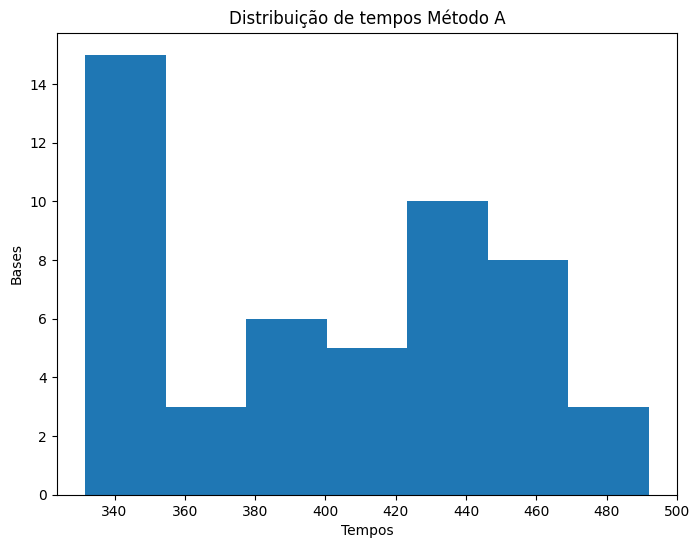

In [ ]:
import matplotlib.pyplot as plt
#from pandasUteis.pandas_utils import frequency_by_natural_order, frequency_by_buckets

x = projeto1['tA']
plt.figure(figsize = (8, 6))
plt.hist(x, bins = 'auto')
plt.title('Distribuição de tempos Método A')
plt.xlabel('Tempos')
plt.ylabel('Bases')


Também podemos ver os histogramas dos três tempos usando o seguinte:

array([[<Axes: title={'center': 'Tempo A'}>,
        <Axes: title={'center': 'Tempo B'}>],
       [<Axes: title={'center': 'Tempo C'}>, <Axes: >]], dtype=object)

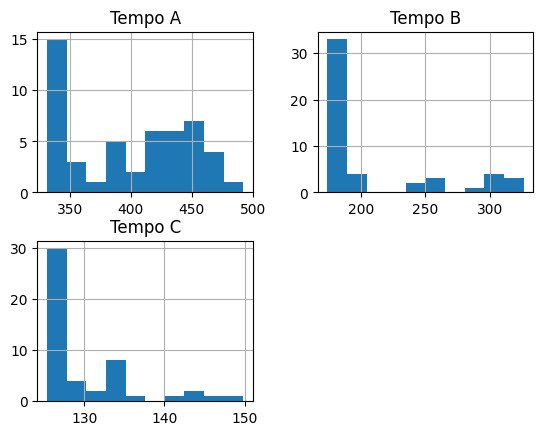

In [ ]:
tempos.hist(bins = 10)

A figura acima confirma as diferenças no comportamento dos tempos para as tarefas A, B e C.



### Boxplot

<Axes: >

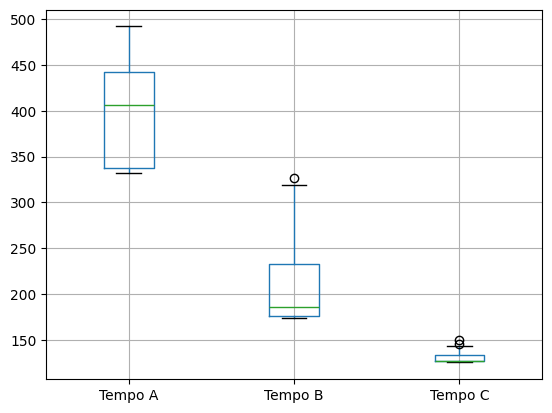

In [ ]:
tempos.boxplot()

A figura do Box plot confirma a assimetria a esquerda do método A e a forma platicúrtica dos dados. Por meio do histograma, também percebemos que a forma dos dados apresenta bimodalidade. Pelo box plot, os métodos B e C apresentam assimetria esquerda.



### Densidade

Text(0, 0.5, 'Proporção')

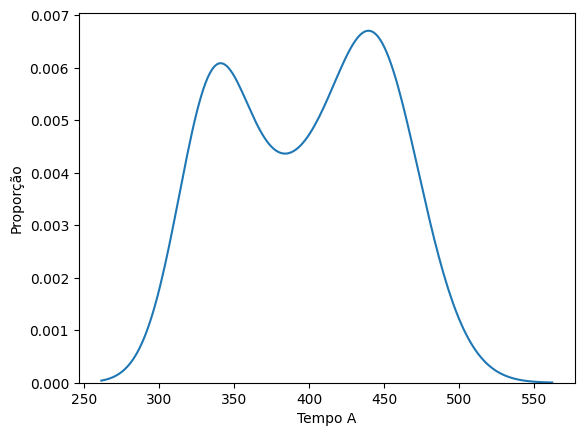

In [ ]:
import seaborn as sns
sns.kdeplot(projeto1['tA'])
plt.xlabel('Tempo A')
plt.ylabel('Proporção')

A figura da densidade acima, mostra as diferenças nos tempos de execução de cada tarefa.


### Distribuição empírica

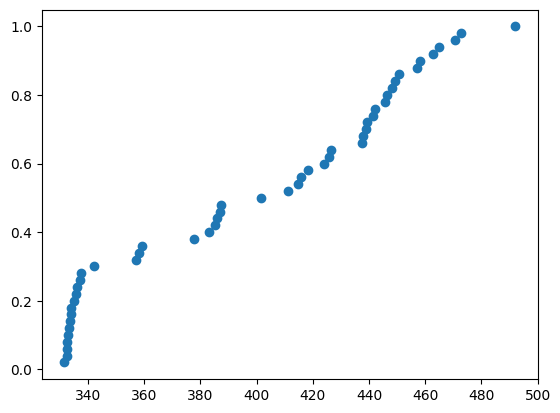

In [ ]:
import numpy as np

def ecdf(data):
    """ Calcula a distribuição empírica """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
r,s = ecdf(projeto1['tA'])
plt.scatter(x = r, y = s)

A densidade mostrada acima confirma a bimodalidade dos dados de tempo usando o método A. Também percebemos, que não há assimetria na função de distribuição acumulada empírica.



# Análise descritiva bidimensional

A seguir apresentamos uma análise correlacional entre todas as variáveis de tempo de execução de tarefas

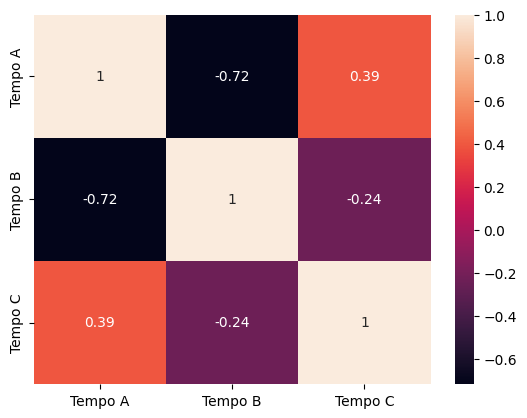

C:\Users\Jhoe\AppData\Local\Temp\ipykernel_11796\123068743.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=-0.7180468802486969, pvalue=4.366847281425137e-09)

In [ ]:
import seaborn as sns # for data visualization

import matplotlib.pyplot as plt
correlation_mat = tempos.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

from scipy.stats.stats import pearsonr
x = projeto1['tA']
y = projeto1['tB']
pearsonr(x, y)

Inicialmente apresentamos o índice de correlação de pearson e posteriormente desenvolvemos um teste onde a hipótese nula
é que não existe correlação entre o tempo A e o tempo B. Neste caso como o valor-p$=4.367e-09$ podemos concluir que ambos tempos estão correlacionados. Note que o sinal é negativo indicando quea correlação é inversa aquí.

A seguinte figura é usada para reportar os resultados da análise correlacional e análise descriva simultáneamente.

array([[<Axes: xlabel='Tempo A', ylabel='Tempo A'>,
        <Axes: xlabel='Tempo B', ylabel='Tempo A'>,
        <Axes: xlabel='Tempo C', ylabel='Tempo A'>],
       [<Axes: xlabel='Tempo A', ylabel='Tempo B'>,
        <Axes: xlabel='Tempo B', ylabel='Tempo B'>,
        <Axes: xlabel='Tempo C', ylabel='Tempo B'>],
       [<Axes: xlabel='Tempo A', ylabel='Tempo C'>,
        <Axes: xlabel='Tempo B', ylabel='Tempo C'>,
        <Axes: xlabel='Tempo C', ylabel='Tempo C'>]], dtype=object)

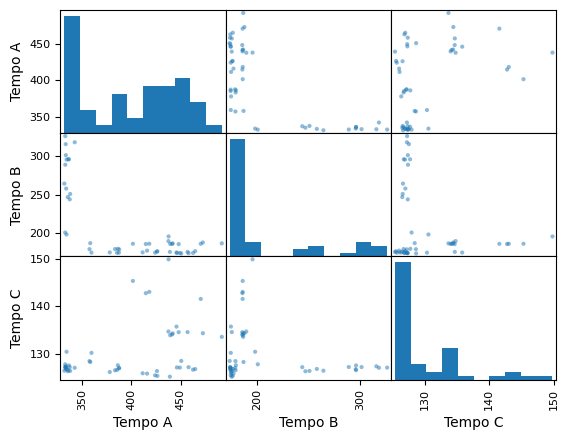

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(tempos)

Na diagonal mostramos o histograma dos dados, no panel
entre cada variável mostramos o diagrama de dispersão dos dados assim o valor da correlação de pearson.